In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
# 1. Load dataset
df = pd.read_csv("emails_cleaned.csv")

X = df[["clean_text", "from", "gmail_labels"]]
y = df["label_encoded"]

In [3]:
# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [4]:
# 3. Define preprocessing for each column
preprocessor = ColumnTransformer(
    transformers=[
        ("text", TfidfVectorizer(max_features=5000, ngram_range=(1,2)), "clean_text"),
        ("from", TfidfVectorizer(max_features=1000), "from"),
        ("gmail_labels", OneHotEncoder(handle_unknown="ignore"), ["gmail_labels"])
    ]
)

In [5]:
# 4. Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": LinearSVC(max_iter=2000, random_state=42)
}

In [6]:
# 5. Evaluation function
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", model)])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average="weighted")
    rec = recall_score(y_test, preds, average="weighted")
    f1 = f1_score(y_test, preds, average="weighted")

    print(f"\n=== {name} ===")
    print("Accuracy :", acc)
    print("Precision:", prec)
    print("Recall   :", rec)
    print("F1-score :", f1)
    print("\nClassification Report:\n", classification_report(y_test, preds))

    # Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return {"Model": name, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1}


=== Logistic Regression ===
Accuracy : 0.92018779342723
Precision: 0.9202204872951198
Recall   : 0.92018779342723
F1-score : 0.9200985208080819

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        41
           1       0.95      0.97      0.96        40
           2       0.87      0.87      0.87        46
           3       0.91      0.93      0.92        46
           4       0.92      0.90      0.91        40

    accuracy                           0.92       213
   macro avg       0.92      0.92      0.92       213
weighted avg       0.92      0.92      0.92       213



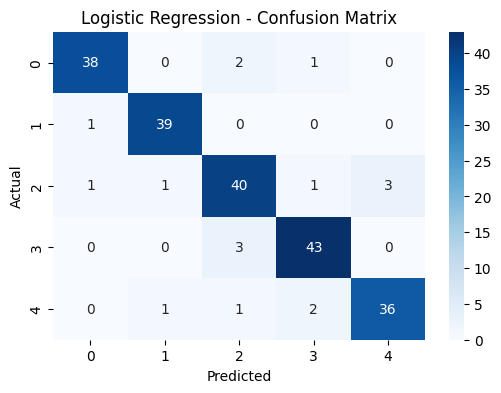


=== Naive Bayes ===
Accuracy : 0.9014084507042254
Precision: 0.9015391179164516
Recall   : 0.9014084507042254
F1-score : 0.9010765005893316

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87        41
           1       0.91      0.97      0.94        40
           2       0.86      0.83      0.84        46
           3       0.96      0.93      0.95        46
           4       0.92      0.90      0.91        40

    accuracy                           0.90       213
   macro avg       0.90      0.90      0.90       213
weighted avg       0.90      0.90      0.90       213



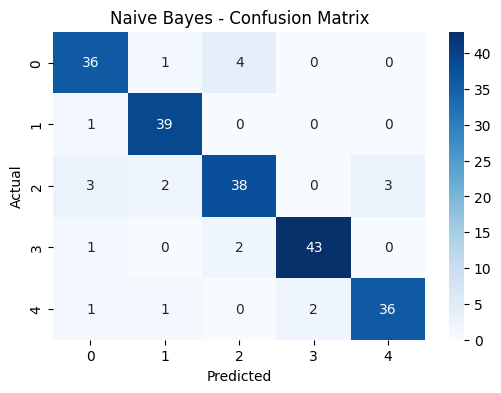


=== Random Forest ===
Accuracy : 0.9154929577464789
Precision: 0.9271640489209059
Recall   : 0.9154929577464789
F1-score : 0.9181220077096541

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91        41
           1       1.00      0.95      0.97        40
           2       0.75      0.93      0.83        46
           3       1.00      0.93      0.97        46
           4       0.92      0.90      0.91        40

    accuracy                           0.92       213
   macro avg       0.93      0.91      0.92       213
weighted avg       0.93      0.92      0.92       213



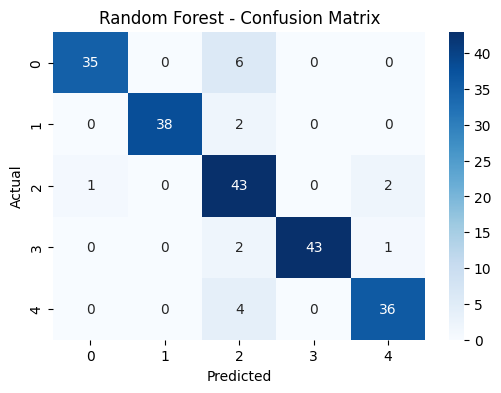

C:\Users\MSI-G\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(



=== SVM ===
Accuracy : 0.9483568075117371
Precision: 0.9481779566286609
Recall   : 0.9483568075117371
F1-score : 0.948110174492861

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        41
           1       0.97      0.97      0.97        40
           2       0.91      0.89      0.90        46
           3       0.96      0.93      0.95        46
           4       0.95      1.00      0.98        40

    accuracy                           0.95       213
   macro avg       0.95      0.95      0.95       213
weighted avg       0.95      0.95      0.95       213



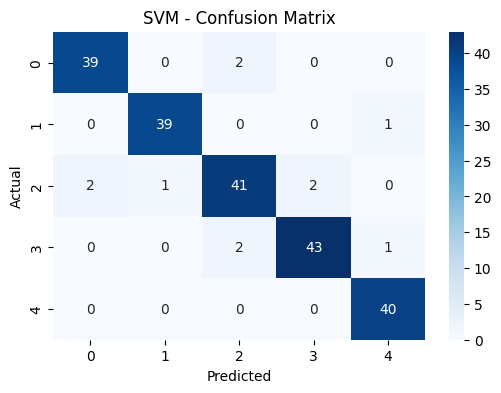

In [7]:
# 6. Run evaluations
results = []
for name, model in models.items():
    results.append(evaluate_model(name, model, X_train, X_test, y_train, y_test))

In [8]:
# 7. Compare results
results_df = pd.DataFrame(results)
results_df["Error Rate"] = 1 - results_df["Accuracy"]

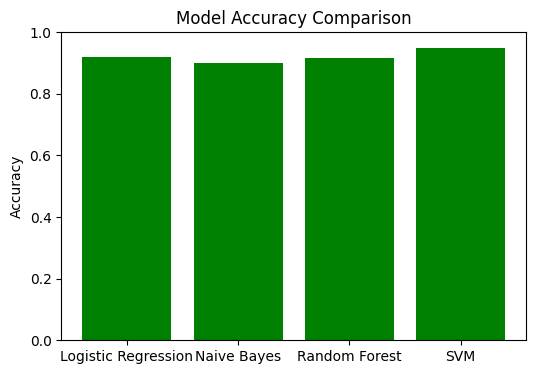

In [9]:
# Accuracy plot
plt.figure(figsize=(6,4))
plt.bar(results_df["Model"], results_df["Accuracy"], color="green")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()

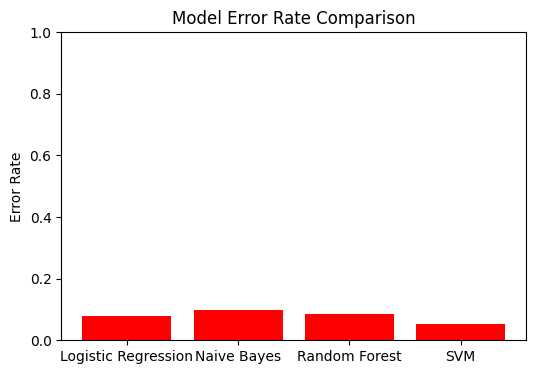

In [10]:
# Error plot
plt.figure(figsize=(6,4))
plt.bar(results_df["Model"], results_df["Error Rate"], color="red")
plt.title("Model Error Rate Comparison")
plt.ylabel("Error Rate")
plt.ylim(0,1)
plt.show()

In [11]:
print("\n=== Model Comparison ===")
print(results_df)


=== Model Comparison ===
                 Model  Accuracy  Precision    Recall        F1  Error Rate
0  Logistic Regression  0.920188   0.920220  0.920188  0.920099    0.079812
1          Naive Bayes  0.901408   0.901539  0.901408  0.901077    0.098592
2        Random Forest  0.915493   0.927164  0.915493  0.918122    0.084507
3                  SVM  0.948357   0.948178  0.948357  0.948110    0.051643


In [12]:
# 8. Save the best model (SVM with preprocessing pipeline)
best_model = Pipeline(steps=[("preprocessor", preprocessor), 
                             ("classifier", LinearSVC(max_iter=2000, random_state=42))])

best_model.fit(X_train, y_train)

joblib.dump(best_model, "email_sorting_svm.pkl")
print("Best SVM model saved as email_sorting_svm.pkl")

C:\Users\MSI-G\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Best SVM model saved as email_sorting_svm.pkl


In [13]:
# Load full pipeline (preprocessor + classifier)
loaded_model = joblib.load("email_sorting_svm.pkl")

# New email input
sample = pd.DataFrame([{
    "clean_text": "Meeting scheduled for tomorrow",
    "from": "boss@company.com",
    "gmail_labels": "Work"
}])

# Direct prediction (no manual vectorizer needed)
pred = loaded_model.predict(sample)[0]
print("Predicted label:", pred)

Predicted label: 3


In [14]:
# Load model
loaded_model = joblib.load("email_sorting_svm.pkl")

# Example new email
sample = pd.DataFrame([{
    "clean_text": "Your electricity bill is due next week.",
    "from": "billing@electricity.com",
    "gmail_labels": "Bills_and_Finance"
}])

# Predict
pred_label = loaded_model.predict(sample)[0]
print("Predicted label (encoded):", pred_label)

Predicted label (encoded): 1
